In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# Model definition

The hypothesis of our model remains unchanged from linear regression:
$$h_\theta(x) = \theta^T x$$

In [2]:
def h(x, theta):   
    return np.dot(theta.T, x)[0][0]

In linear regression our goal is to
$$\min_{\theta} \sum_{i=1}^{m} \Big( y^{(i)} - h_\theta (x^{(i)}) \Big)^2$$

In LOESS we modify the goal as following:
$$\min_{\theta} \sum_{i=1}^{m} w^{(i)} \Big( y^{(i)} - h_\theta (x^{(i)}) \Big)^2$$
where $w^{(i)}$ is called a *weight* and is typically defined as
$$w^{(i)} = e^{-{{(x^{(i)} - X)^2} \over {2 \tau^2}}}$$
where $X$ is where we are evaluating LOESS and $\tau$ is a hyperparameter called *bandwidth*.


Thus, our cost function $J(\theta)$ is defined as
$$J(\theta) = {1 \over {2m}} \sum_{i=1}^{m} w^{(i)} (h_\theta(X^{(i)}) - y^{(i)})^2$$

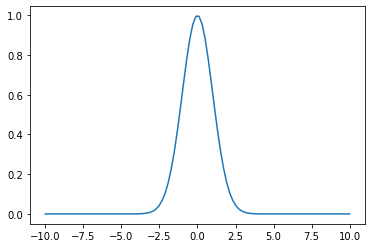

In [3]:
def weight(X, X_eval, tau):   
    power_numerator = (np.linalg.norm((X - X_eval), axis=1) ** 2).reshape(-1, 1)
    power = -(power_numerator / (2 * (tau ** 2)))
    
    return np.exp(power)

x = np.linspace(-10, 10, 100)
y = weight(np.append(np.ones((x.shape[0], 1)), x.reshape(-1, 1), axis=1), np.array([1.0, 0.0]), 1.0)

plt.plot(x, y)
plt.show()

In [4]:
def J(X_eval, X, y, theta, tau):
    m = X.shape[0]
    err = np.matmul(X, theta) - y
    weights = weight(X, X_eval, tau).reshape(-1, 1)
    
    return 1 / (2 * m) * np.sum(np.multiply(weights, err ** 2))

The partial derivative of $J(\theta)$ for each $\theta_j$:

$${\partial \over {\partial \theta_j}} J(\theta) = {1 \over m} \sum_{i=1}^{m} w^{(i)} ((h_\theta(X^{(i)}) - y^{(i)}) \cdot X^{(i)}_j) $$

In [5]:
def J_deriv(X_eval, X, y, theta, tau):
    m = X.shape[0]
    
    err = np.matmul(X, theta) - y
    weights = weight(X, X_eval, tau).reshape(err.shape)    
    weighted_err = np.multiply(err, weights)
    
    return 1 / m * np.matmul(X.T, weighted_err)

In [6]:
def gradient_descent(X_eval, X, y, starting_theta, alpha=0.01, epochs=5, tau=1):
    theta = np.copy(starting_theta)
    errors = [J(X_eval, X, y, theta, tau)]
    
    for epoch in range(epochs):
        derivs = J_deriv(X_eval, X, y, theta, tau)
        theta -= alpha * derivs
        
        errors.append(J(X_eval, X, y, theta, tau))
    
    return theta, errors

# LOESS in practice

### 1. Generating data

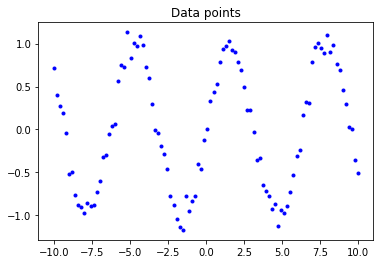

In [7]:
m = 100

data = np.linspace(-10, 10, m).reshape(-1, 1)
X = np.append(np.ones(data.shape), data, axis=1)

noise = np.random.normal(0, 1, m).reshape(-1, 1) / 10
y = np.sin(data) + noise

plt.plot(data, y, 'b.')
plt.title('Data points')

plt.show()

### 2. Training the model

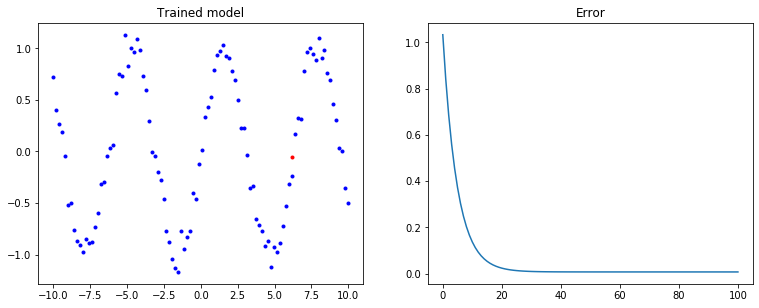

Learnt theta value:
[[ 2.03693193]
 [-0.33761987]]
Final cost: 1.4401101891556496e-39


In [8]:
X_eval = 6.2
tau = 0.4

theta, errors = gradient_descent(
    np.array([1.0, X_eval]),
    X,
    y,
    np.random.normal(size=X.shape[1]).reshape(-1, 1),
    alpha=0.05,
    epochs=100,
    tau=tau
)
pred_y = h(np.array([[1.0], [X_eval]]), theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4 * 2, 4.8))

ax1.plot(data, y, 'b.')
ax1.plot(X_eval, pred_y, 'r.')
ax1.set_title('Trained model')

ax2.plot(errors)
ax2.set_title('Error')

plt.show()

print('Learnt theta value:')
print(theta)

print('Final cost:', J(X_eval, X, y, theta, tau))

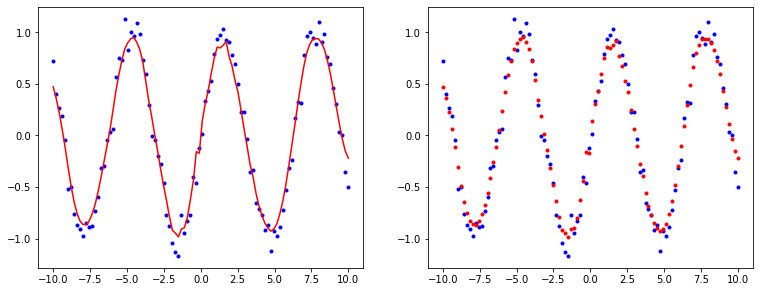

In [9]:
tau = 0.4

y_pred = []

for X_eval in data:
    theta, _ = gradient_descent(
        np.array([1.0, X_eval[0]]),
        X,
        y,
        np.random.normal(size=X.shape[1]).reshape(-1, 1),
        alpha=0.05,
        epochs=1000,
        tau=tau
    )
    y_pred.append(h(np.array([[1.0], [X_eval]]), theta))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4 * 2, 4.8))

ax1.plot(data, y, 'b.')
ax1.plot(data, y_pred, 'r')

ax2.plot(data, y, 'b.')
ax2.plot(data, y_pred, 'r.')

plt.show()